[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/elcursodeia-code/blob/master/dl/03_fundamentos.ipynb)

# El Perceptrón

Existen varias tareas que podemos llevar a cabo con un `Perceptrón`. La primera que se propuso es la `regresión lineal`. En este tipo de tarea, como en cualquier tarea de regresión, queremos obtener un modelo que se ajuste de la mejor forma posible a un conjunto de datos determinado. En el caso de la regresión lineal, este modelo será una línea recta y el `Perceptrón`, utilizando una función de activación lineal, $f(x) = x$, es de hecho capaz de llevar a cabo esta tarea.

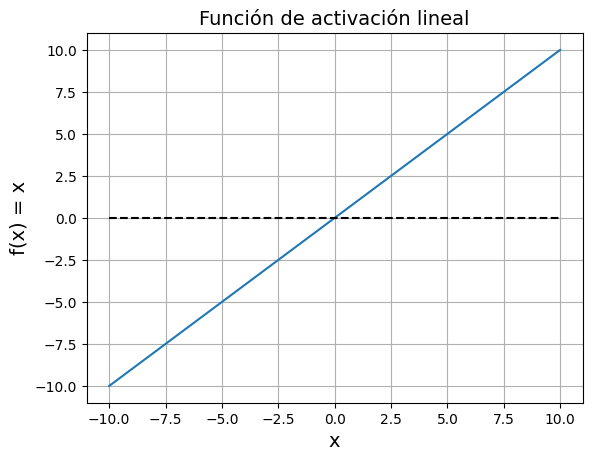

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10)
y = x

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = x', fontsize=14)
plt.title('Función de activación lineal', fontsize=14)
plt.plot(x, np.zeros(len(x)), '--k')
plt.show()

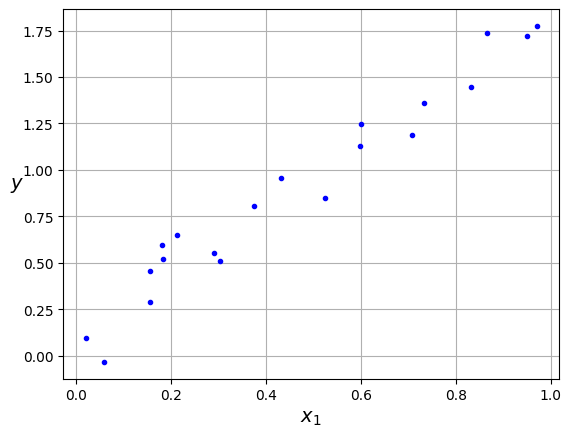

In [2]:
np.random.seed(42)

x = np.random.rand(20)
y = 2*x + (np.random.rand(20)-0.5)*0.5

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

El objetivo es que el `Perceptrón`, al recibir cada uno de estos valores, nos dé como salida un valor lo más cercano posible a $y$. En este caso, al tener una sola característica por elemento, nuestro `Perceptrón` sigue la siguiente expresión:

$$
 \hat{y} = \mathbf{w} \cdot \mathbf{x} = w_0 + w_1 x_1
$$

En el caso en que $w_0 = 0$ y $w_1 = 2$, $\hat{y} = 2 x$

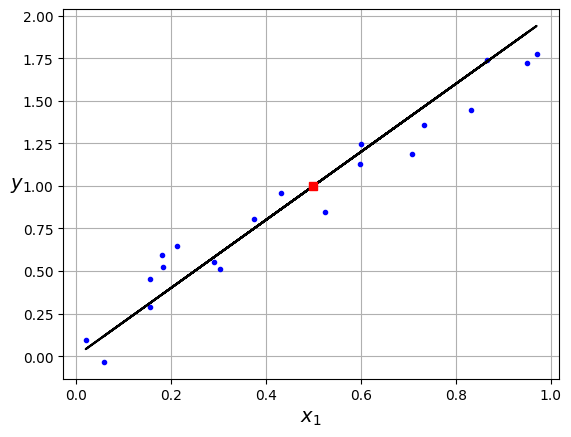

In [3]:
plt.plot(x, y, "b.")
plt.plot(x, 2*x, 'k')
plt.plot(0.5, 2*0.5, 'sr')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

Sin embargo, aquí hemos hecho algo de trampa... En este ejemplo sabemos que los pesos de nuestro modelo son $w_0 = 0$ y $w_1 = 2$, ya que son los mismos utilizados para generar los datos. Nuestro objetivo será el de encontrar estos valores, y para ello utilizamos el famoso algoritmo de `descenso por gradiente`.

In [44]:
from matplotlib import animation, rc
rc('animation', html='html5')

def init_fig(x, t, ws, cost_ws):
    """Initialise figure"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax2.plot(x, t, 'bo', label='$y$')
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 2])
    ax2.set_xlabel('$x$', fontsize=15)
    # ax2.set_ylabel('$      \hat{y}$', fontsize=15, rotation=0)
    ax2.yaxis.set_label_position('right')
    # ax2.set_title('Labelled data & model output', fontsize=18)
    line2, = ax2.plot([], [], 'k-', label='$\hat{y}=x*w_1$')
    ax2.legend(loc=2)
    # Cost function plot
    ax1.plot(ws, cost_ws, 'r-', label='coste')
    ax1.set_ylim([-2, 8])
    ax1.set_xlim([1, 3])
    ax1.set_xlabel('$w_1$', fontsize=15)
    ax1.set_ylabel('$\sum |\hat{y}-y|^2$', fontsize=15)
    cost_text = ax1.set_title('step {}'.format(0), fontsize=18)
    line1, = ax1.plot([], [], 'k:', label='derivada')
    pc_dots, = ax1.plot([], [], 'ko')
    ax1.legend(loc=2)
    return fig, ax1, ax2, line1, line2, pc_dots, cost_text

def get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights):
    """Return animation function."""
    xs = np.linspace(0, 4, num=100)  # weight values
    def anim(i):
        """Animate step i"""
        if i == 0:
            return [line1, line2, pc_dots, cost_text]
        (w, dw, cost) = weights[i-1]
        cost_text.set_text('{:.3f} (step {})'.format(cost, i))
        ws, _, cs = zip(*weights[0:i])
        pc_dots.set_xdata(ws)
        pc_dots.set_ydata(cs)
        abline_values = [dw * (x-w) + cost for x in xs]
        line1.set_xdata(xs)
        line1.set_ydata(abline_values)
        # Plot fit
        # plot the fitted line
        line2.set_xdata([0, 1])
        line2.set_ydata([0*w, 1*w])
        ax2.legend(loc=2)
        return [line1, line2, pc_dots, cost_text]
    return anim

def gradient(w, x, t): 
    return np.sum(2.* x * (x*w - t))

def cost(y, t): 
  return ((t - y)**2).sum()

ws = np.linspace(0, 4, num=100)  
cost_ws = np.vectorize(lambda w: cost(x*w, y))(ws)  
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
plt.close(fig)  

In [45]:
w = 1.
lr = 0.001
epochs = 20
weights = [(w, gradient(w, x, y), cost(x*w, y))]
for i in range(epochs):
    dw = gradient(w, x, y)
    w = w - lr*dw
    weights.append((w, dw, cost(x*w, y)))

animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=200, blit=True)
anim

Stochastic Gradient Descent

In [46]:
w = 1
lr = 0.1
epochs = 2
weights = [(w, gradient(w, x, y), cost(x*w, y))]
N = x.shape[0]
ixs = np.arange(N)
for i in range(epochs):
    np.random.shuffle(ixs)
    for ix in ixs:
      _x, _y = x[ix], y[ix]
      dw = gradient(w, _x, _y)
      w = w - lr*dw
      weights.append((w, dw, cost(_x*w, _y)))

fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
plt.close(fig)  
animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=200, blit=True)
anim

Mini-Batch Gradient Descent

In [47]:
w = 1
lr = 0.01
epochs = 10
batch_size = 10
weights = [(w, gradient(w, x, y), cost(x*w, y))]
ixs = np.arange(x.shape[0])
batches = x.shape[0] // batch_size
for i in range(epochs):
    np.random.shuffle(ixs)
    for i in range(batches):
      _x, _y = x[ixs[i*batch_size:(i+1)*batch_size]], y[ixs[i*batch_size:(i+1)*batch_size]]
      dw = gradient(w, _x, _y)
      w = w - lr*dw
      weights.append((w, dw, cost(_x*w, _y)))
    
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
plt.close(fig)
animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=200, blit=True)
anim

# Clasificación

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# funciones de pérdida

def mse(y, y_hat):
		return np.mean((y_hat - y)**2)

def bce(y, y_hat):
		return - np.mean(y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat))

# funciones de activación

def linear(x):
		return x

def step(x):
		return x > 0

def sigmoid(x):
	return 1 / (1 + np.exp(-x))

# Perceptrón

class Perceptron():
	def __init__(self, size, activation, loss):
		self.w = np.random.randn(size)
		self.ws = []
		self.activation = activation
		self.loss = loss

	def __call__(self, w, x):
		return self.activation(np.dot(x, w))

	def fit(self, x, y, epochs, lr):
		x = np.c_[np.ones(len(x)), x]
		for epoch in range(epochs):
				# Batch Gradient Descent
				y_hat = self(self.w, x)
				# función de pérdida
				l = self.loss(y, y_hat)
				# derivadas
				dldh = (y_hat - y)
				dhdw = x
				dldw = np.dot(dldh, dhdw)
				# actualizar pesos
				self.w = self.w - lr*dldw
				# guardar pesos para animación
				self.ws.append(self.w.copy())

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int) # clsificación binaria

X.shape, y.shape

((150, 2), (150,))

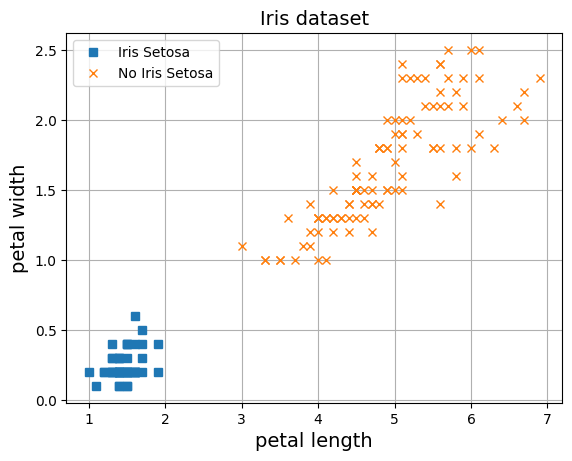

In [10]:
plt.plot(X[y==1, 0], X[y==1, 1], 's', label="Iris Setosa")
plt.plot(X[y==0, 0], X[y==0, 1], 'x', label="No Iris Setosa")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

In [11]:
np.random.seed(42)

perceptron = Perceptron(3, sigmoid, bce)
epochs, lr = 20, 0.01
perceptron.fit(X, y, epochs, lr)

In [12]:
from matplotlib.colors import ListedColormap
from matplotlib import animation, rc
rc('animation', html='html5')

def plot(epoch, w):
    ax.clear()
    tit = ax.set_title(f"Epoch {epoch+1}", fontsize=14)
    axes = [0, 5, 0, 2]
    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    X_new = np.c_[np.ones(len(X_new)), X_new]
    y_predict = perceptron(w, X_new)
    zz = y_predict.reshape(x0.shape)

    ax.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
    ax.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

    ax.contourf(x0, x1, zz, cmap=custom_cmap)
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="lower right", fontsize=14)
    ax.axis(axes)
    plt.close()
    return [tit]

def get_anim(fig, ax, ws):
    def anim(i):
        return plot(i, ws[i])
    return anim

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, autoscale_on=False)
animate = get_anim(fig, ax, perceptron.ws)
anim = animation.FuncAnimation(fig, animate, frames=len(perceptron.ws), interval=100, blit=True)
anim

In [13]:
w = perceptron.ws[-1]
w

array([ 3.1121193 , -1.14317047, -0.70370935])

In [14]:
x_new = [1, 2, 0.5]
y_pred = perceptron(w, x_new)
y_pred # Iris Setosa

np.float64(0.6163120194730393)

In [15]:
x_new = [1, 1, 0.5]
y_pred = perceptron(w, x_new)
y_pred # Iris Setosa

np.float64(0.8343939887777257)

In [16]:
x_new = [1, 3, 0.5]
y_pred = perceptron(w, x_new)
y_pred # No Iris Setosa

np.float64(0.33866551968712194)

In [17]:
x_new = [1, 4, 0.5]
y_pred = perceptron(w, x_new)
y_pred # No Iris Setosa

np.float64(0.14034623285805603)

Como puedes observar, el modelo está más seguro cuanto más nos alejamos de la frontera de decisión (valores más cercanos a $0$ o $1$). Sin embargo, cuanto más cerca de la frontera de decisión nos encontramos, el modelo está menos seguro dando resultados más cercanos a $0.5$. ¿Cómo asignamos una clase u otra entonces? Lo más común es decidir un valor umbral, `threshold`, a partir del cual asignaremos una clase u otra. El valor más común es el de $0.5$ (cualquier valor por encima será asignado a la clase en cuestión). El valor de este `threshold` puede modificarse en cualquier caso para adaptarnos a los criterios de diseño buscados, el ratio entre `falsos positivos` y `falsos negativos`. Esto es muy importante sobre todo en aplicaciones sensibles como sistemas de ayuda al diagnóstico médico, por ejemplo, en el que es más importante no tener `falsos negativos` que `falsos positivos` (y, por lo tanto, se escogerá un `threshold` acorde, aunque ello dé como resultado un modelo peor según otras métricas).

## Clasificación multiclase


In [18]:
def softmax(x):
	return np.exp(x) / np.exp(x).sum(axis=-1,keepdims=True)

# aplica softmax + cross entropy de manera estable

def crossentropy(y, y_hat):
	logits = y_hat[np.arange(len(y_hat)),y]
	entropy = - logits + np.log(np.sum(np.exp(y_hat),axis=-1))
	return entropy.mean()

# solo si usamos softmax
def grad_crossentropy(y, y_hat):
	answers = np.zeros_like(y_hat)
	answers[np.arange(len(y_hat)),y] = 1
	return (- answers + softmax(y_hat)) / y_hat.shape[0]

In [19]:
class Perceptron():
	def __init__(self, inputs, outputs, activation, loss, grad_loss):
		inputs = inputs + 1
		self.w = np.random.normal(loc=0.0,
					scale = np.sqrt(2/(inputs+outputs)),
					size = (inputs, outputs))
		self.ws = []
		self.activation = activation
		self.loss = loss
		self.grad_loss = grad_loss

	def __call__(self, w, x):
		return self.activation(np.dot(x, w))

	def fit(self, x, y, epochs, lr, batch_size=None, verbose=True, log_each=1):
		if batch_size == None:
				batch_size = len(x)
		x = np.c_[np.ones(len(x)), x]
		batches = len(x) // batch_size
		for epoch in range(1,epochs+1):
				# Mini-Batch Gradient Descent
				for b in range(batches):
						_x = x[b*batch_size:(b+1)*batch_size]
						_y = y[b*batch_size:(b+1)*batch_size]
						y_hat = self(self.w, _x)
						#print(y_hat.shape)
						# función de pérdida
						l = self.loss(_y, y_hat)
						# derivadas
						dldh = self.grad_loss(_y, y_hat)
						dhdw = _x
						dldw = np.dot(dhdw.T, dldh)
						# actualizar pesos
						self.w = self.w - lr*dldw
				# guardar pesos para animación
				self.ws.append(self.w.copy())
				# print loss
				if verbose and not epoch % log_each:
						print(f"Epoch {epoch}/{epochs} Loss {l}")

	def predict(self, x):
		x = np.c_[np.ones(len(x)), x]
		return self(self.w, x)

In [20]:
# Mean Square Error -> usada para regresión (con activación lineal)
def mse(y, y_hat):
		return np.mean((y_hat - y.reshape(y_hat.shape))**2)

# Binary Cross Entropy -> usada para clasificación binaria (con sigmoid)
def bce(y, y_hat):
		return - np.mean(y.reshape(y_hat.shape)*np.log(y_hat) - (1 - y.reshape(y_hat.shape))*np.log(1 - y_hat))

# solo si usamos activación lineal
def grad_mse(y, y_hat):
		return y_hat - y.reshape(y_hat.shape)

# solo si utilizamos sigmoid
def grad_bce(y, y_hat):
		return y_hat - y.reshape(y_hat.shape)

class LinearRegression(Perceptron):
	def __init__(self, inputs, outputs=1):
		super().__init__(inputs, outputs, linear, mse, grad_mse)

class LinearClassification(Perceptron):
	def __init__(self, inputs, outputs=1):
		super().__init__(inputs, outputs, step, mse, grad_mse)

class LogisticRegression(Perceptron):
	def __init__(self, inputs, outputs=1):
		super().__init__(inputs, outputs, sigmoid, bce, grad_bce)

class SoftmaxRegression(Perceptron):
	def __init__(self, inputs, outputs):
		# usamos activación lineal porque `crossentropy` ya incluye la softmax
		super().__init__(inputs, outputs, linear, crossentropy, grad_crossentropy)

In [21]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X_norm = (X - X_mean) / X_std # normalización

y = iris.target

X.shape, y.shape

((150, 2), (150,))

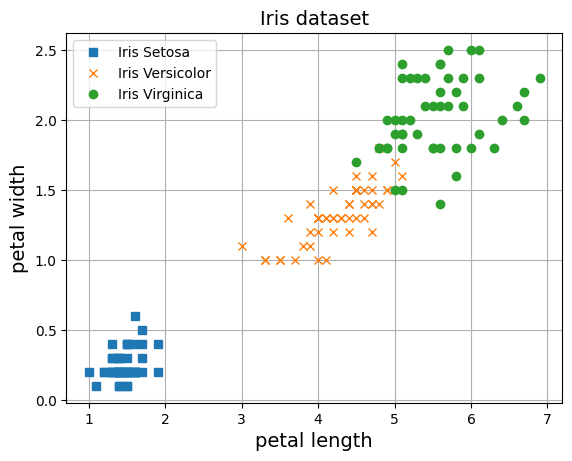

In [22]:
plt.plot(X[y==0, 0], X[y==0, 1], 's', label="Iris Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], 'x', label="Iris Versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], 'o', label="Iris Virginica")
plt.grid()
plt.legend()
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.title("Iris dataset", fontsize=14)
plt.show()

In [23]:
perceptron = SoftmaxRegression(2, 3)
epochs, lr = 50, 1
perceptron.fit(X_norm, y, epochs, lr, log_each=10)

Epoch 10/50 Loss 0.38517606377509095
Epoch 20/50 Loss 0.2833762837179968
Epoch 30/50 Loss 0.23431113329472666
Epoch 40/50 Loss 0.20462912517287857
Epoch 50/50 Loss 0.18456061551031783


In [24]:
def plot_multiclass(perceptron, N=4):
    fig, axes = plt.subplots(2, N//2, figsize=(10, 8), squeeze=False)
    for n in range(N):
        if n == 0 or n == N-1: t = n + 1 if n == 0 else len(perceptron.ws)-1
        else: t = int(n*len(perceptron.ws)/(N-1))
        ax = axes[n//(N//2), n%(N//2)]
        resolution=0.02
        ax.set_title(f"Epoch {t}", fontsize=14)
        # setup marker generator and color map
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
        X_new = (np.array([xx1.ravel(), xx2.ravel()]).T - X_mean)/X_std
        X_new = np.c_[np.ones(len(X_new)), X_new]
        w = perceptron.ws[t]
        Z = perceptron(w, X_new)
        Z = np.argmax(softmax(Z), axis=1)
        Z = Z.reshape(xx1.shape)
        ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        ax.set_xlim(xx1.min(), xx1.max())
        ax.set_ylim(xx2.min(), xx2.max())
        ax.set_xlabel('petal length', fontsize=12)
        ax.set_ylabel('petal width', fontsize=12)
        classes = ["Iris-Setosa", "Iris-Versicolor", "Iris-Virginica"]
        for idx, cl in enumerate(np.unique(y)):
            ax.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=0.8,
                        c=colors[idx],
                        marker=markers[idx],
                        label=classes[cl],
                        edgecolor='black')
        if n == N-1:  # Only add legend to the last plot
            ax.legend(loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()

/var/folders/y3/b8p5hz955g15mpwh6fvd90940000gn/T/ipykernel_14365/1000306595.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y == cl, 0],


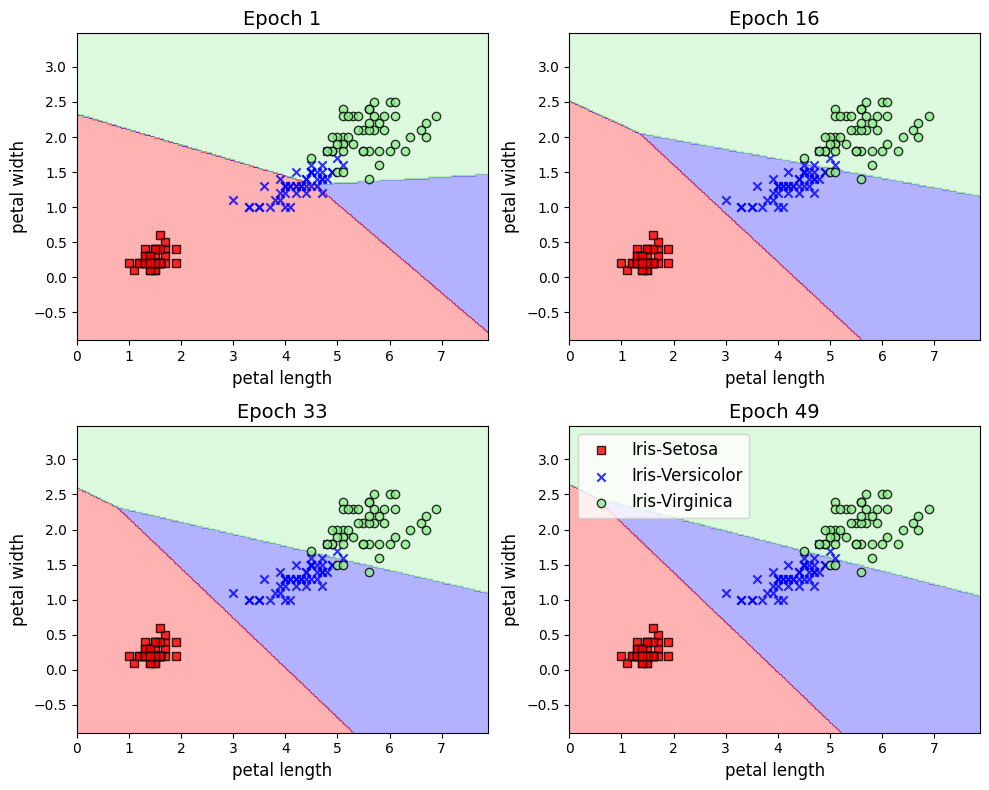

In [25]:
plot_multiclass(perceptron)

In [26]:
#  nuevo punto
X_new = [[2, 0.5]]
# normalizamos
X_new_norm = (X_new - X_mean) / X_std
# salida del perceptron
y = perceptron.predict(X_new_norm)
y

array([[ 3.4251035 ,  1.53812024, -5.23172823]])

In [27]:
y_probas = softmax(y)
y_probas

array([[8.68280030e-01, 1.31568946e-01, 1.51023859e-04]])

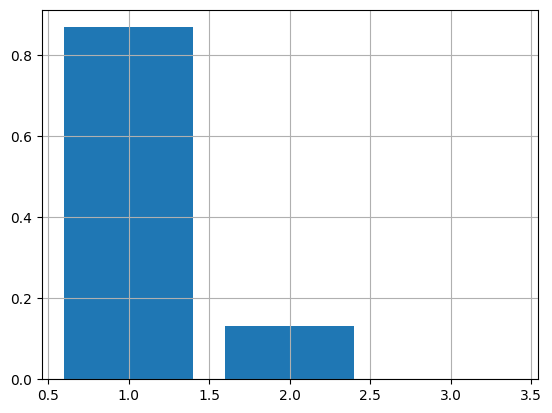

In [28]:
plt.bar(list(range(1,4)), y_probas[0])
plt.grid(True)
plt.show()

In [29]:
y_probas.sum(axis=1)

array([1.])

In [30]:
y_pred = np.argmax(y_probas, axis=1)
y_pred

array([0])

In [31]:
def evaluate(x):
	x = (x - X_mean) / X_std
	y = perceptron.predict(x)
	y_probas = softmax(y)
	return np.argmax(y_probas, axis=1)

In [32]:
X = [[5, 1],[2, 0.5],[7, 3]]
evaluate(X)

array([1, 0, 2])

# El Preceptrón Multicapa

In [33]:
def relu(x):
	return np.maximum(0, x)

def reluPrime(x):
	return x > 0

class MLP():
	def __init__(self, D_in, H, D_out):
		self.w1, self.b1 = np.random.normal(loc=0.0, scale=np.sqrt(2/(D_in+H)), size=(D_in, H)), np.zeros(H)
		self.w2, self.b2 = np.random.normal(loc=0.0, scale=np.sqrt(2/(H+D_out)), size=(H, D_out)), np.zeros(D_out)
		self.ws = []
		self.loss = mse
		self.grad_loss = grad_mse

	def __call__(self, x):
		self.h_pre = np.dot(x, self.w1) + self.b1
		self.h = relu(self.h_pre)
		y_hat = np.dot(self.h, self.w2) + self.b2
		return y_hat

	def fit(self, X, Y, epochs = 100, lr = 0.001, batch_size=None, verbose=True, log_each=1):
		batch_size = len(X) if batch_size == None else batch_size
		batches = len(X) // batch_size
		l = []
		for e in range(1,epochs+1):
				# Mini-Batch Gradient Descent
				_l = []
				for b in range(batches):
						x = X[b*batch_size:(b+1)*batch_size]
						y = Y[b*batch_size:(b+1)*batch_size]
						y_pred = self(x)
						loss = self.loss(y, y_pred)
						_l.append(loss)
						# Backprop
						dldy = self.grad_loss(y, y_pred)
						grad_w2 = np.dot(self.h.T, dldy)
						grad_b2 = dldy.mean(axis=0)
						dldh = np.dot(dldy, self.w2.T)*reluPrime(self.h_pre)
						grad_w1 = np.dot(x.T, dldh)
						grad_b1 = dldh.mean(axis=0)
						# Update (GD)
						self.w1 = self.w1 - lr * grad_w1
						self.b1 = self.b1 - lr * grad_b1
						self.w2 = self.w2 - lr * grad_w2
						self.b2 = self.b2 - lr * grad_b2
				l.append(np.mean(_l))
				self.ws.append((
						self.w1.copy(),
						self.b1.copy(),
						self.w2.copy(),
						self.b2.copy()
				))
				if verbose and not e % log_each:
						print(f'Epoch: {e}/{epochs}, Loss: {np.mean(l):.5f}')

	def predict(self, ws, x):
		w1, b1, w2, b2 = ws
		h = relu(np.dot(x, w1) + b1)
		y_hat = np.dot(h, w2) + b2
		return y_hat

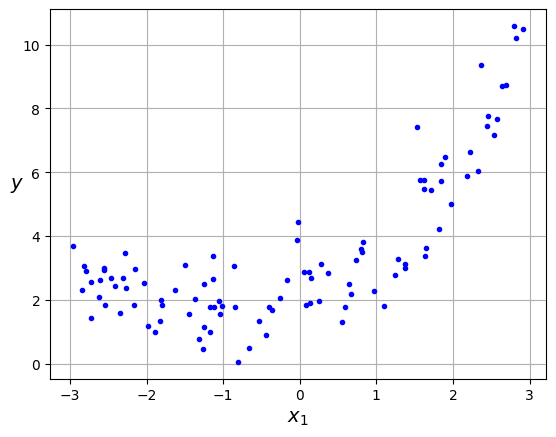

In [34]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

In [57]:
model = MLP(D_in=1, H=5, D_out=1)
epochs, lr = 50, 0.0002
model.fit(x, y, epochs, lr, batch_size=1, log_each=10)

Epoch: 10/50, Loss: 9.16782
Epoch: 20/50, Loss: 5.75046
Epoch: 30/50, Loss: 4.21272
Epoch: 40/50, Loss: 3.42794
Epoch: 50/50, Loss: 2.95556


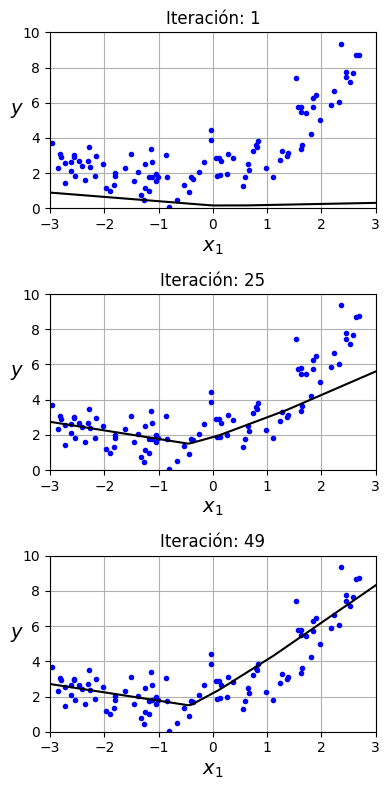

In [54]:
N = 3
fig, axs = plt.subplots(N, 1, figsize=(4, 8))
for n in range(N):
	if n == 0 or n == N-1: t = n + 1 if n == 0 else len(model.ws)-1
	else: t = int(n*len(model.ws)/(N-1))
	ax = axs[n]
	ax.plot(x, y, "b.")
	_x_new = np.linspace(-3, 3, 100)
	x_new = _x_new.reshape(len(_x_new),1)
	w = model.ws[t]
	y_pred = model.predict(w, x_new)
	ax.plot(_x_new, y_pred, "-k")
	ax.set_xlabel("$x_1$", fontsize=14)
	ax.set_ylabel("$y$", rotation=0, fontsize=14)
	ax.set_title(f"Iteración: {t}")
	ax.grid(True)
	ax.axis([-3,3,0,10])
plt.tight_layout()
plt.show()